<a href="https://colab.research.google.com/github/areeshaj3109/Hotel-Booking-Cancellation-Analysis/blob/main/Hotel_Booking_Cancellation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


**Making dataframe from the dataset**

In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['hotel_bookings.csv']))

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Checking number of rows and columns**

In [ ]:
df.shape

(119390, 32)

**Checking column's datatype**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Finding columns with missing values**

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Visualizing columns with missing values**

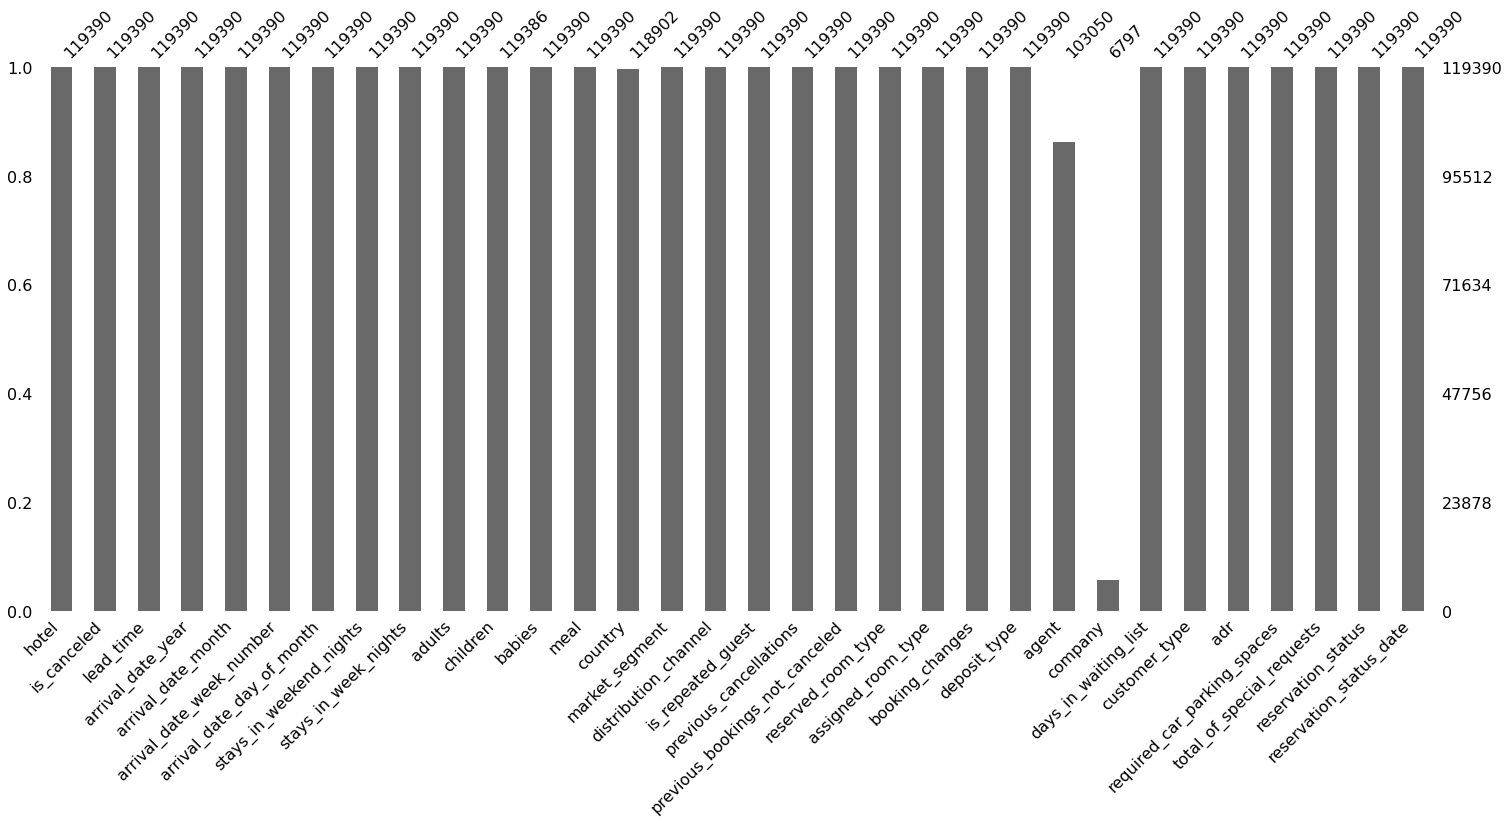

In [ ]:
import missingno
missingno.bar(df)

**Handling missing values**

In [ ]:
df['agent'] = df.agent.fillna(0)
df['company'] = df.company.fillna(0)


In [ ]:
df = df[df["children"].notna() & df["country"].notna()]

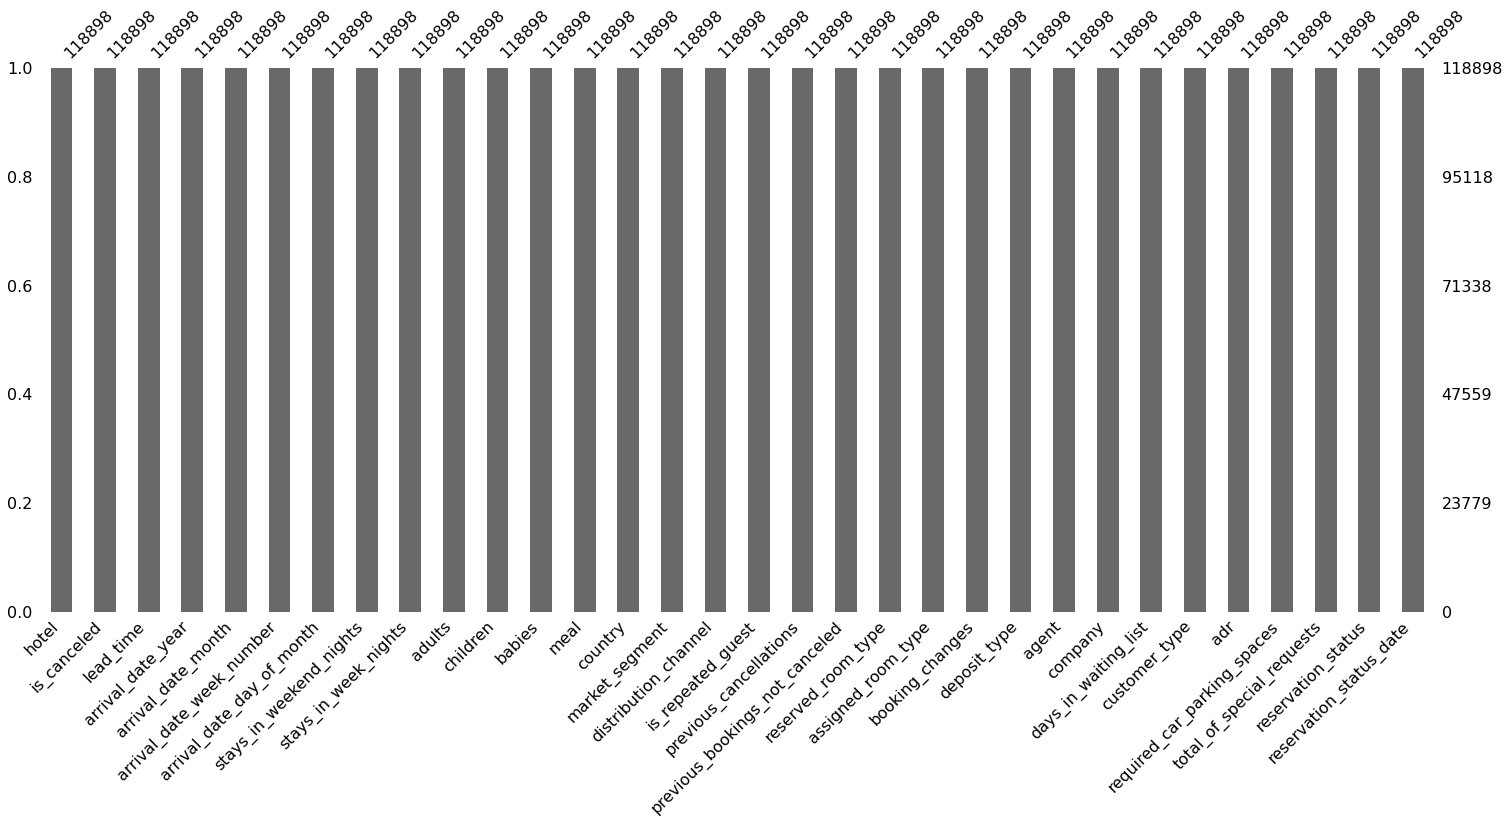

In [ ]:
from missingno import missingno
missingno.bar(df)

**Float to integer on column (children)**

In [ ]:
import numpy as np

columns = ["children"]
df[columns] = df[columns].applymap(np.int64)

**Float to categorical on columns (agent,company)**

In [ ]:
columns = ["company","agent"]
df[columns] = df[columns].astype(np.object)

**Int to categorical on columns (is_canceled, is_repeated_guest)**

In [ ]:
columns = ["is_canceled","is_repeated_guest"]
df[columns] = df[columns].astype(np.object)

**Dimension Reduction**

In [ ]:
df['arrival_date'] = pd.to_datetime(df.arrival_date_day_of_month.astype(str) + '/' + df.arrival_date_month.astype(str) + '/' + df.arrival_date_year.astype(str) )

In [ ]:
df['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 118898, dtype: datetime64[ns]

In [ ]:
import datetime as dt

df['arrival_date'] = df['arrival_date'].map(dt.datetime.toordinal)

In [ ]:
df.shape

(118898, 33)

**Dropping columns which are no longer needed due to dimension reduction**

In [ ]:
df = df.drop(columns=["arrival_date_day_of_month","arrival_date_week_number", "arrival_date_month", "arrival_date_year" ])

In [ ]:
df.shape

(118898, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  object 
 2   lead_time                       118898 non-null  int64  
 3   stays_in_weekend_nights         118898 non-null  int64  
 4   stays_in_week_nights            118898 non-null  int64  
 5   adults                          118898 non-null  int64  
 6   children                        118898 non-null  int64  
 7   babies                          118898 non-null  int64  
 8   meal                            118898 non-null  object 
 9   country                         118898 non-null  object 
 10  market_segment                  118898 non-null  object 
 11  distribution_channel            118898 non-null  object 
 12  is_repeated_gues

**Seperating categorical data**

In [ ]:
categorical_columns = [column for column in df.columns if (df[column].dtype == 'object')]
df_categorical_columns = df[categorical_columns]
df_categorical_columns

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,BB,PRT,Direct,Direct,0,C,C,No Deposit,0,0,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,BB,PRT,Direct,Direct,0,C,C,No Deposit,0,0,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,BB,GBR,Direct,Direct,0,A,C,No Deposit,0,0,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,304,0,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,240,0,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,BB,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,394,0,Transient,Check-Out,2017-09-06
119386,City Hotel,0,BB,FRA,Online TA,TA/TO,0,E,E,No Deposit,9,0,Transient,Check-Out,2017-09-07
119387,City Hotel,0,BB,DEU,Online TA,TA/TO,0,D,D,No Deposit,9,0,Transient,Check-Out,2017-09-07
119388,City Hotel,0,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,89,0,Transient,Check-Out,2017-09-07


**Seperating numerical data**

In [ ]:
numerical_columns = [column for column in df.columns if (df[column].dtype == 'int' or df[column].dtype == 'float')]
df_numerical_columns = df[numerical_columns]
df_numerical_columns

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,342,0,0,2,0,0,0,0,3,0.0,0,0.00,0,0,735780
1,737,0,0,2,0,0,0,0,4,0.0,0,0.00,0,0,735780
2,7,0,1,1,0,0,0,0,0,0.0,0,75.00,0,0,735780
3,13,0,1,1,0,0,0,0,0,0.0,0,75.00,0,0,735780
4,14,0,2,2,0,0,0,0,0,0.0,0,98.00,0,1,735780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,5,2,0,0,0,0,0,0.0,0,96.14,0,0,736571
119386,102,2,5,3,0,0,0,0,0,0.0,0,225.43,0,2,736572
119387,34,2,5,2,0,0,0,0,0,0.0,0,157.71,0,4,736572
119388,109,2,5,2,0,0,0,0,0,0.0,0,104.40,0,0,736572


**Checking variance of numerical data columns**

In [ ]:
variance = df_numerical_columns.var()
variance

lead_time                         2.573673e+00
stays_in_weekend_nights           9.924464e-01
stays_in_week_nights              2.502164e-01
adults                            3.347497e-01
children                          1.593386e-01
babies                            9.482907e-03
previous_cancellations            7.154943e-01
previous_bookings_not_canceled    6.588793e-02
booking_changes                   4.261283e-01
company                           1.324122e+00
days_in_waiting_list              5.059881e-01
adr                               5.367926e-01
required_car_parking_spaces       5.962009e-02
total_of_special_requests         6.283383e-01
arrival_date                      9.231529e-08
dtype: float64

**Normalizing columns having variance greater than 1**

In [ ]:
import numpy as np
i = 0
for var in variance:
  if(var > 1):
    df_numerical_columns[numerical_columns[i]] = np.log(df_numerical_columns[numerical_columns[i]] + 1)
  i += 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
variance = df_numerical_columns.var()
variance

lead_time                         2.279069e-01
stays_in_weekend_nights           9.924464e-01
stays_in_week_nights              2.502164e-01
adults                            3.347497e-01
children                          1.593386e-01
babies                            9.482907e-03
previous_cancellations            7.154943e-01
previous_bookings_not_canceled    6.588793e-02
booking_changes                   4.261283e-01
company                           1.660747e-01
days_in_waiting_list              5.059881e-01
adr                               5.367926e-01
required_car_parking_spaces       5.962009e-02
total_of_special_requests         6.283383e-01
arrival_date                      9.231529e-08
dtype: float64

**Encoding categorical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

    

In [ ]:
df

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,342,0,0,2,0,0,0,135,3,1,0,0,0,2,2,3,0,0,0,0,2,0.00,0,0,1,121,735780
1,1,0,737,0,0,2,0,0,0,135,3,1,0,0,0,2,2,4,0,0,0,0,2,0.00,0,0,1,121,735780
2,1,0,7,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,0,0,0,2,75.00,0,0,1,122,735780
3,1,0,13,0,1,1,0,0,0,59,2,0,0,0,0,0,0,0,0,221,0,0,2,75.00,0,0,1,122,735780
4,1,0,14,0,2,2,0,0,0,59,6,3,0,0,0,0,0,0,0,174,0,0,2,98.00,0,1,1,123,735780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,5,2,0,0,0,15,5,3,0,0,0,0,0,0,0,272,0,0,2,96.14,0,0,1,919,736571
119386,0,0,102,2,5,3,0,0,0,56,6,3,0,0,0,4,4,0,0,9,0,0,2,225.43,0,2,1,920,736572
119387,0,0,34,2,5,2,0,0,0,43,6,3,0,0,0,3,3,0,0,9,0,0,2,157.71,0,4,1,920,736572
119388,0,0,109,2,5,2,0,0,0,59,6,3,0,0,0,0,0,0,0,78,0,0,2,104.40,0,0,1,920,736572


In [ ]:
df.shape

(118898, 29)

In [ ]:
x = df
x = x.drop(columns = 'is_canceled')
y = df['is_canceled']
x.shape
y.shape

(118898,)

**Splitting data into train and test**
**x = data**
**y = labels**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

**Logistic Regression Model**

roc_auc_score for Logistic Regression Model:  0.6515831726768246
Accuracy of Logistic Regression Model is 0.7065584912072042


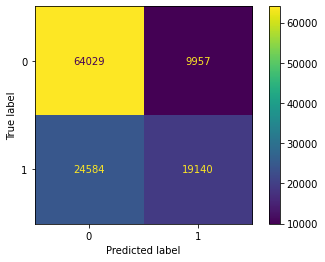

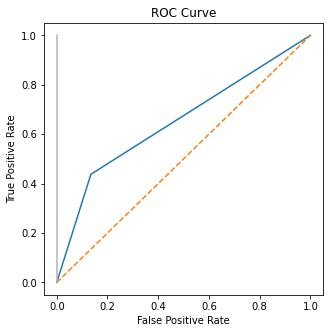

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lr = LogisticRegression()
lr.fit(x_train, y_train)

prediction = lr.predict(x_test)

accuracy = accuracy_score(y_test, prediction)

fpr, tpr, threshold1 = roc_curve(y_test, prediction)

print('roc_auc_score for Logistic Regression Model: ', roc_auc_score(y_test, prediction))


print("Accuracy of Logistic Regression Model is " + str(accuracy))
ConfusionMatrixDisplay.from_predictions(y_test, prediction)

plt.subplots(1, figsize=(5,5))
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")  
plt.plot([0, 0], [1, 0] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



**Decision Tree Classifier Model**

roc_auc_score for DecisionTree:  1.0
Accuracy Score of Decision Tree Model is 1.0


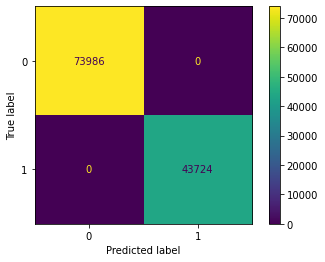

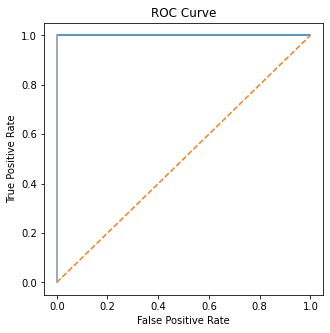

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

prediction = dt.predict(x_test)

accuracy = accuracy_score(y_test, prediction)

fpr, tpr, threshold1 = roc_curve(y_test, prediction)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, prediction))

print("Accuracy Score of Decision Tree Model is " + str(accuracy))
ConfusionMatrixDisplay.from_predictions(y_test, prediction)


plt.subplots(1, figsize=(5,5))
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")  
plt.plot([0, 0], [1, 0] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



**Random Forest Classifier Model**

roc_auc_score for Random Forest:  0.9874554020675144
Accuracy Score of Random Forest Model is 0.9906804859400221


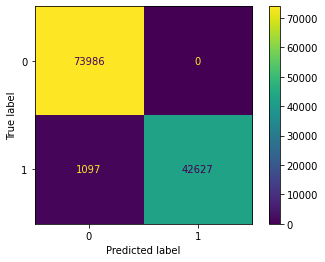

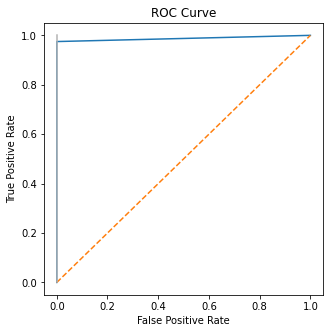

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

prediction = rf.predict(x_test)

accuracy = accuracy_score(y_test, prediction)

fpr, tpr, threshold1 = roc_curve(y_test, prediction)

print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, prediction))

print("Accuracy Score of Random Forest Model is " + str(accuracy))
ConfusionMatrixDisplay.from_predictions(y_test, prediction)




plt.subplots(1, figsize=(5,5))
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")  
plt.plot([0, 0], [1, 0] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Gradient Boosting Classifier Model**

roc_auc_score for Gradient Boosting:  1.0
Accuracy Score of Gradient Boosting Classifier Model is 1.0


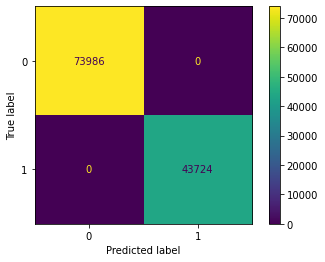

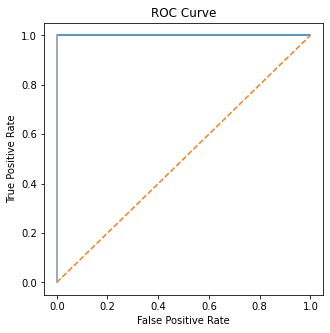

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

prediction = gb.predict(x_test)

accuracy = accuracy_score(y_test, prediction)

fpr, tpr, threshold1 = roc_curve(y_test, prediction)

print('roc_auc_score for Gradient Boosting: ', roc_auc_score(y_test, prediction))

print("Accuracy Score of Gradient Boosting Classifier Model is " + str(accuracy))
ConfusionMatrixDisplay.from_predictions(y_test, prediction)


plt.subplots(1, figsize=(5,5))
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")  
plt.plot([0, 0], [1, 0] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**INSIGHTS & FINDING**

In [ ]:
a = df.groupby(["hotel", "is_canceled"]).size().reset_index(name="frequency")
a

,hotel,is_canceled,frequency
0,0,0,46226
1,0,1,33076
2,1,0,28519
3,1,1,11077


In [ ]:
p0 = ( a.iloc[1][2]/(a.iloc[1][2] + a.iloc[0][2]) )* 100
p0

41.70891024186023

In [ ]:
p1 = ( a.iloc[3][2]/(a.iloc[3][2] + a.iloc[2][2]) )* 100
p1

27.975047984644913

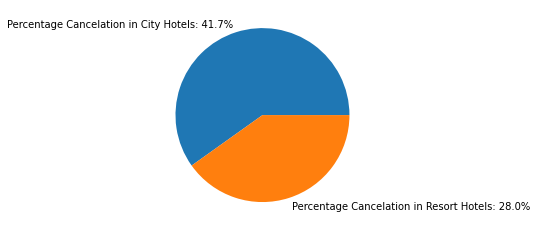

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([p0, p1])
mylabels = ["Percentage Cancelation in City Hotels: 41.7%", "Percentage Cancelation in Resort Hotels: 28.0%"]

plt.pie(y, labels = mylabels)
plt.show() 


In [ ]:
a = df.groupby(["customer_type", "is_canceled"]).size().reset_index(name="frequency")
a

,customer_type,is_canceled,frequency
0,0,0,2814
1,0,1,1262
2,1,0,512
3,1,1,58
4,2,0,52714
5,2,1,36460
6,3,0,18705
7,3,1,6373


In [ ]:
p0 = ( a.iloc[1][2]/(a.iloc[1][2] + a.iloc[0][2]) )* 100
p0 = round(p0,1)
p0

31.0

In [ ]:
p1 = ( a.iloc[3][2]/(a.iloc[3][2] + a.iloc[2][2]) )* 100
p1 = round(p1,1)
p1

10.2

In [ ]:
p2 = ( a.iloc[5][2]/(a.iloc[5][2] + a.iloc[4][2]) )* 100
p2 = round(p2,1)
p2

40.9

In [ ]:
p3 = ( a.iloc[7][2]/(a.iloc[7][2] + a.iloc[6][2]) )* 100
p3 = round(p3,1)
p3

25.4

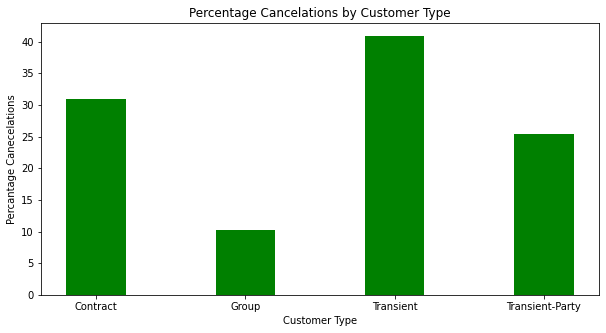

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Contract':p0, 'Group':p1, 'Transient':p2, 'Transient-Party':p3}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='green',
        width = 0.4)
 
plt.xlabel("Customer Type")
plt.ylabel("Percantage Canecelations")
plt.title("Percentage Cancelations by Customer Type")
plt.show()

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['hotel_bookings.csv']))
a = df.groupby(["arrival_date_month", "is_canceled"]).size().reset_index(name="frequency")
a

,arrival_date_month,is_canceled,frequency
0,April,0,6565
1,April,1,4524
2,August,0,8638
3,August,1,5239
4,December,0,4409
5,December,1,2371
6,February,0,5372
7,February,1,2696
8,January,0,4122
9,January,1,1807


In [ ]:
p0 = ( a.iloc[1][2]/(a.iloc[1][2] + a.iloc[0][2]) )* 100
p0 = round(p0,1)

p1 = ( a.iloc[3][2]/(a.iloc[3][2] + a.iloc[2][2]) )* 100
p1 = round(p1,1)

p2 = ( a.iloc[5][2]/(a.iloc[5][2] + a.iloc[4][2]) )* 100
p2 = round(p2,1)

p3 = ( a.iloc[7][2]/(a.iloc[7][2] + a.iloc[6][2]) )* 100
p3 = round(p3,1)

p4 = ( a.iloc[9][2]/(a.iloc[9][2] + a.iloc[8][2]) )* 100
p4 = round(p4,1)

p5 = ( a.iloc[11][2]/(a.iloc[11][2] + a.iloc[10][2]) )* 100
p5 = round(p5,1)

p6 = ( a.iloc[13][2]/(a.iloc[13][2] + a.iloc[12][2]) )* 100
p6 = round(p6,1)

p7 = ( a.iloc[15][2]/(a.iloc[15][2] + a.iloc[14][2]) )* 100
p7 = round(p7,1)

p8 = ( a.iloc[17][2]/(a.iloc[17][2] + a.iloc[16][2]) )* 100
p8 = round(p8,1)

p9 = ( a.iloc[19][2]/(a.iloc[19][2] + a.iloc[18][2]) )* 100
p9 = round(p9,1)

p10 = ( a.iloc[21][2]/(a.iloc[21][2] + a.iloc[20][2]) )* 100
p10 = round(p10,1)

p11 = ( a.iloc[23][2]/(a.iloc[23][2] + a.iloc[22][2]) )* 100
p11 = round(p11,1)

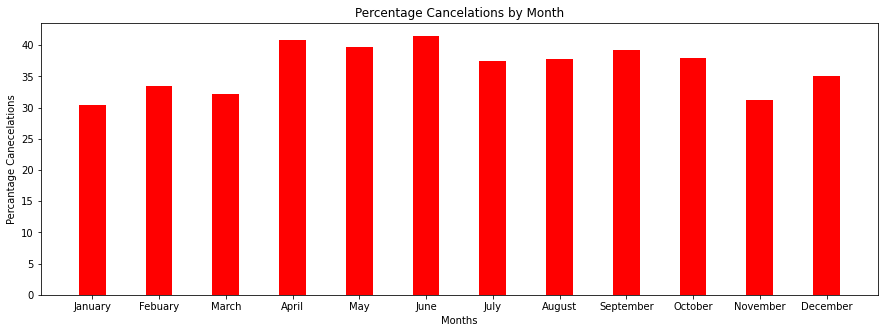

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'January':p4, 'Febuary':p3, 'March':p7, 'April':p0, 'May':p8, 'June':p6, 'July':p5, 'August':p1, 'September':p11, 'October':p10, 'November':p9, 'December':p2}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(x, y, color ='red',
        width = 0.4)
 
plt.xlabel("Months")
plt.ylabel("Percantage Canecelations")
plt.title("Percentage Cancelations by Month")
plt.show()

In [ ]:
a = df.groupby(["is_repeated_guest", "is_canceled"]).size().reset_index(name="frequency")
a

,is_repeated_guest,is_canceled,frequency
0,0,0,71908
1,0,1,43672
2,1,0,3258
3,1,1,552


In [ ]:
p0 = ( a.iloc[1][2]/(a.iloc[1][2] + a.iloc[0][2]) )* 100
p0 = round(p0,1)

p1 = ( a.iloc[3][2]/(a.iloc[3][2] + a.iloc[2][2]) )* 100
p1 = round(p1,1)

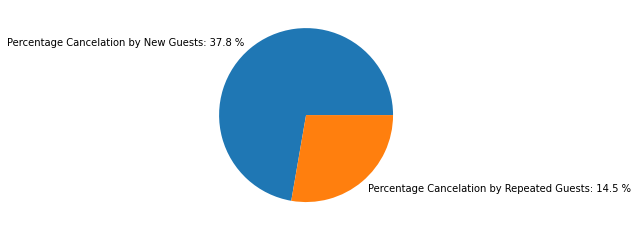

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([p0, p1])
mylabels = ["Percentage Cancelation by New Guests: " + str(p0) + " %", "Percentage Cancelation by Repeated Guests: " + str(p1) + " %"]

plt.pie(y, labels = mylabels)
plt.show() 